In [1]:
%load_ext autoreload
%autoreload 2
from pyMSOO.MFEA.model import EBSGA
from pyMSOO.utils.Crossover import *
from pyMSOO.utils.Mutation import *
from pyMSOO.utils.Selection import *
from pyMSOO.utils.DimensionAwareStrategy import *
from pyMSOO.MFEA.benchmark.continous import *
from pyMSOO.utils.MultiRun.RunMultiTime import * 

random percent: 0
random percent: 0
I am using the MFEA algorithm to optimize several different tasks. Help me generate 4 different guide lines to construct a Random Mating Probability (RMP) matrix using the following information:
You are given the following input information:
- 'task_count': The number of tasks.
- 'pop_mean': A matrix of shape (task_count, indi_len), where each row represents the mean vector of the population for each task. It describes the average position of individuals in the search space per task.
- 'pop_variance': A matrix of shape (task_count, indi_len), where each row represents the per-dimension variance of individuals in the population of each task. It describes the spread or diversity within each task.
Each guide line should:
- Use these statistics to assess **the similarity or difference between tasks** in terms of distribution in the search space.
- Propose how RMP values between task pairs should be adjusted accordingly.
- Be logically sound, non-trivial,

In [12]:
tasks, IndClass = CEC17_benchmark.get_2tasks_benchmark(5)
# tasks, IndClass = WCCI22_benchmark.get_complex_benchmark(10)
# tasks, IndClass = CEC17_benchmark.get_10tasks_benchmark()
# tasks, IndClass = WCCI22_benchmark.get_50tasks_benchmark(10)
# tasks, IndClass = GNBG_benchmark.get_multitask_benchmark(3)

In [13]:

baseModel = EBSGA.model()
baseModel.compile(
	IndClass= IndClass,
	tasks= tasks,
	# crossover = KL_SBXCrossover(nc= 2, k= 100, conf_thres= 1),
	crossover= SBX_Crossover(nc = 2),
	# crossover= DaS_SBX_Crossover(),
	mutation= PolynomialMutation(nm = 5),
	selection= ElitismSelection(),
	dimension_strategy=DaS_strategy()
)
solve = baseModel.fit(
	nb_generations = 1000, rmp = 0.5, nb_inds_each_task= 100, 
	bound_pop= [0, 1], evaluate_initial_skillFactor= True
)

random percent: 0
Seed: None -- Time: 00m 19.84s  100 % [====================>]  Cost: 2.95670E+00  1.64677E+02  ,  
END!


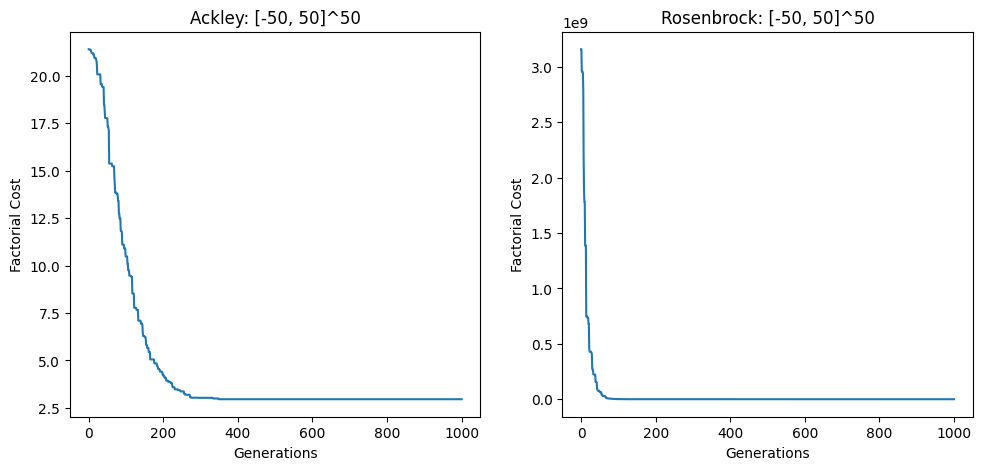

In [14]:
baseModel.render_history()

In [4]:
print(baseModel.E_o)

[4800.73969755 4700.42516588 1900.4564377  6900.73959501 3100.89297414
 4800.8544734 ]


In [5]:
print(baseModel.E_s)

[95200.16284529 95300.42153116 98100.01368557 93100.67865208
 96900.43076184 95200.90745467]


In [6]:
print(baseModel.R_o)

[0.72935298 0.42280689 0.08330685 0.99868892 0.16535491 0.25126414]


In [7]:
print(baseModel.R_s)

[321.46439467 325.75941957 301.31351628 357.56509514 315.28931804
 288.55453978]
